## Rate Model of 1 Excitatory and 2 Inhibitory populations
3 Wilson-Cowan style populations with feedforward input from thalamus and recurrent connections.

Following the 2 population model in Natan et al 2015, 4 population model in Litwin-Kumar et al 2016, and 3 population model in Park and Geffen 2019

Rough outline:
0. Make general model with 3x3 weight matrix
1. Implement all of Park population and stimulation pattern

1. Reproduce one iso-frequency unit 
3. Reproduce three iso-frquency unit model outcome 
4. Introduce 
4. Extend to reproduce experimental findings in Natan

In [1]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os, fnmatch
import time
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy import stats
from scipy import optimize
from scipy.signal import decimate
from scipy import signal
from scipy import integrate
import seaborn as sns

import gc
import time

%matplotlib inline


from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0
rcParams['pdf.fonttype'] = 42
# import custom functions


# import custom functions
from helper_functions import *
import helper_functions

# reload(helper_functions)
# from helper_functions import *
figure_directory = "/home/auguste/Documents/CNE_PhD/organisation/Cajal/Project/code/1E3I/figures/park/"
fontsize = 20
axiswidth = 1.5

/home/auguste/Software/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [89]:
def network(r, t, J, T):    
    drdt = -r + transfer_func(inputcurrent(t) + np.dot(J,r))
    return drdt/T

def linear_network(r, t, W, T):    
    # linearized network
    drdt = np.dot(W,r)-r + constant_b(t)
    return drdt/T

def transfer_func(curr_input):
    # transfer function from current to firing rate   
    return curr_input

def transfer_func_park(r,gain = 3, r_max = 1, r_min = 0 ):
    # transfer function from current to firing rate
    if r < r_min:
        r = r_min
    elif r > r_max:
        r = gain
    else:
        r = gain*r
    return r

def inputcurrent(t):
    # time-varying input to the network
    return 0

def constant_b(t):
    # it's a convenient trick so we can index input by time, but it seems
    # the integration is time asynchronous, i.e. at uneven time steps
    return 0
    return np.array([0,0,0,5]).T

def plot_rates(t,r, colorarr):
    c_ord = [0,2,1,4]
    labels = ['E','PV','SOM','VIP']
    for i in range(len(r)):
        plt.plot(t,r[:,i],color = colorarr[i],label=labels[i])
        
    plt.xlabel('Time (s)')
    plt.ylabel('Firing Rate (Hz)')
    plt.legend()
    
def stimulus(dur=0.1,pause=0.3, T = 10):
    ''' generate input stimulus 
    input:
    dur tone duration: 100 ms
    pause inter stimulus pause 300 ms
    T total run time 
    output:
    numpy array with spiketimes'''
    N_pulse = int(np.floor(T/(dur+pause)))-1
    print(N_pulse)
    stim = np.zeros((N_pulse,2))
    for i in range(N_pulse):
        stim[i,0] = (i+1)*(dur+pause)
    stim[:,1] = stim[:,0] + dur
    return stim

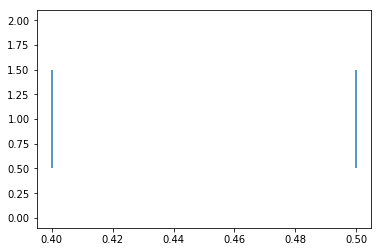

In [90]:
plt.eventplot(stim[0,:])

In [98]:
x = np.linspace(-1,2,100)
x_nl = np.copy(x)
for i in range(len(x)):
    x_nl[i] = transfer_func_park(x[i])

figsize=(5, 4)
ylabel = r"f(x)"
xlabel =r"x"

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
axiswidth = 1.5
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(axiswidth)
ax.xaxis.set_tick_params(width=axiswidth)
ax.yaxis.set_tick_params(width=axiswidth)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
plt.plot(x,x_nl, lw = 3, c = "darkblue", label="k = 10")
#plt.plot(x,y, lw = 3, c = "darkred", label="k = 1")

# for q in steps:
#     plt.axhline(y=q, c="grey")
plt.xlabel(xlabel, fontsize = fontsize)
plt.ylabel(ylabel, fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
# plt.legend(fontsize = fontsize)

plt.tight_layout()

save_fig(figure_directory, "nonlinearity_xy")

In [103]:
color = ["midnightblue","darkgreen","darkorange","purple"]

r0 = np.array([4,9,5]).T
T, dt = 1, 0.0001
t = np.arange(0,T,dt)

W_EE, W_ES, W_EP,W_PE, W_PP, W_PS,W_SE, W_SP, W_SS = [1.1,2,1,1,2,2,6,0,0]


W = np.array([[W_EE, W_ES, W_EP],
              [W_PE, W_PP, W_PS],
              [W_SE, W_SP, W_SS]])


taus = np.array([0.01, 0.01, 0.01]).T # all populations have a timeconstant of 10 ms
r = integrate.odeint(linear_network, r0, t, args=(W, taus))

In [ ]:
def synaptic_depression(g_0,g,tau1,tau2)

IndexError: index 3 is out of bounds for axis 1 with size 3

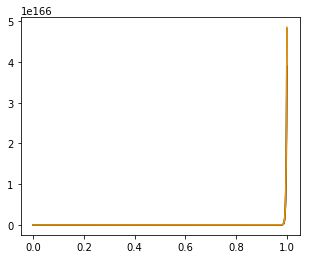

In [83]:
plt.figure(figsize=(5,4))
plot_rates(t,r,color)

In [88]:
r[0]

array([4., 9., 5.])

# Park implementation

In [ ]:
par tone1on=30,tone1off=40
par tone2on=70,tone2off=80
par tone3on=110,tone3off=120
par tone4on=150,tone4off=160
par tone5on=190,tone5off=200


    

color = ["midnightblue","darkgreen","darkorange","purple"]

r0 = np.array([4,9,5,3]).T
T, dt = 0.5, 0.001
t = np.arange(0,T,dt)
W_EE = 0.8
W = np.array([[W_EE, -1, -1, 0],
              [1, -1, -0.5, 0],
              [1, 0, 0, -0.25],
              [1, 0, -0.6, 0]])


taus = np.array([0.02, 0.02, 0.02, 0.02]).T
r = integrate.odeint(linear_network, r0, t, args=(W, taus))

In [1]:
#fig = plt.figure(figsize=(4,3))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(5,10))
fig.subplots_adjust(wspace=0.2)
axiswidth = 1.5

ylabel = r"$V $ [mV]"
xlabel ="time [ms]"


for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(axiswidth)
ax1.xaxis.set_tick_params(width=axiswidth)
ax1.yaxis.set_tick_params(width=axiswidth)
for axis in ['top','right']:
    ax1.spines[axis].set_linewidth(0)
ax1.plot(t, v, lw = 3, c = "darkblue")
#plt.plot(t,gi, label="I input", lw = 3, c = "darkred")

#ax1.set_xlabel(xlabel, fontsize = fontsize)
ax1.set_ylabel(ylabel, fontsize = fontsize)


for label in (ax1.get_yticklabels()):
        label.set_fontsize(fontsize)
for label in (ax1.get_xticklabels()):
        label.set_fontsize(fontsize)

        
ylabel = "gating vatiables"
xlabel ="time [ms]"


for axis in ['bottom','left']:
    ax2.spines[axis].set_linewidth(axiswidth)
ax2.xaxis.set_tick_params(width=axiswidth)
ax2.yaxis.set_tick_params(width=axiswidth)
for axis in ['top','right']:
    ax2.spines[axis].set_linewidth(0)
ax2.plot(t, n, label = 'n',lw = 3, c = "darkgreen")
ax2.plot(t, h, label = 'h',lw = 3, c = "magenta")
ax2.plot(t, m, label = 'm',lw = 3, c = "darkorange")

#plt.plot(t,gi, label="I input", lw = 3, c = "darkred")

#ax2.set_xlabel(xlabel, fontsize = fontsize)
ax2.set_ylabel(ylabel, fontsize = fontsize)
ax2.legend(fontsize = fontsize)

for label in (ax2.get_yticklabels()):
        label.set_fontsize(fontsize)
for label in (ax2.get_xticklabels()):
        label.set_fontsize(fontsize)

ylabel = "I [nA]"
xlabel ="time [ms]"


for axis in ['bottom','left']:
    ax3.spines[axis].set_linewidth(axiswidth)
ax3.xaxis.set_tick_params(width=axiswidth)
ax3.yaxis.set_tick_params(width=axiswidth)
for axis in ['top','right']:
    ax3.spines[axis].set_linewidth(0)

ax3.plot(t, I_ex, label="E input", lw = 3, c = "darkred")

ax3.set_xlabel(xlabel, fontsize = fontsize)
ax3.set_ylabel(ylabel, fontsize = fontsize)

for label in (ax3.get_yticklabels()):
        label.set_fontsize(fontsize)
for label in (ax3.get_xticklabels()):
        label.set_fontsize(fontsize)
plt.tight_layout()
save_fig(figure_directory, "HH_model")

hello


In [ ]:
figsize=(5, 4)
ylabel = r"y"
xlabel =r"x"

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
axiswidth = 1.5
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(axiswidth)
ax.xaxis.set_tick_params(width=axiswidth)
ax.yaxis.set_tick_params(width=axiswidth)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
plt.plot(x,z, lw = 3, c = "darkblue", label="k = 10")
plt.plot(x,y, lw = 3, c = "darkred", label="k = 1")

for q in steps:
    plt.axhline(y=q, c="grey")
plt.xlabel(xlabel, fontsize = fontsize)
plt.ylabel(ylabel, fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.legend(fontsize = fontsize)

plt.tight_layout()

save_fig(figure_directory, "sigmoid_xy")